In [1]:
from pyvtk import *
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
VtkData?

Init signature: VtkData(*args, **kws)
Docstring:     
VtkData

Represents VTK file that has four relevant parts:
  header    - string up to length 255
  format    - string: ascii | binary
  DataSet   - StructuredPoints | StructuredGrid | UnstructuredGrid
              | RectilinearGrid | PolyData
  Data      - PointData | CellData
  
Usage:
------
  v = VtkData(<DataSet instance> [,<header string>,<Data instances>,..])
  v = VtkData(<filename>, only_structure = 0) - read VTK data from file.
  v.tofile(filename, format = 'ascii') - save VTK data to file.
Attributes:
  header
  structure
  point_data
  cell_data
Public methods:
  to_string(format = 'ascii')
  tofile(filename, format = 'ascii')

DataSet

  StructuredPoints(<3-sequence of dimensions>
                   [,<3-sequence of origin> [, <3-sequence of spacing>]])
  StructuredGrid(<3-sequence of dimensions>,
                 <sequence of 3-sequences of points>)
  UnstructuredGrid(<sequence of 3-sequences of points>
               

## Example 1:

### PolyData

#### define dataset:

In [3]:
structure = PolyData(
    points=[[0,0,0],[1,0,0],[1,1,0],[0,1,0],
            [0,0,1],[1,0,1],[1,1,1],[0,1,1]],
    
    
    polygons=[[0,1,2,3],[4,5,6,7],[0,1,5,4],
            [2,3,7,6],[0,4,7,3],[1,2,6,5]] )

In [4]:
pointdata = PointData(
    Scalars( [0,1,2,3,4,5,6,7],
             name='sample_scalars' ) )

In [5]:
celldata = CellData(
    Scalars( [0,1,2,3,4,5],
             name='cell_scalars'),
    
    Normals( [[0,0,1],[0,0,1],[0,-1,0],
             [0,1,0],[-1,0,0],[1,0,0]],
             name='cell_normals'),
    
    Field( 'FieldData',
           cellIds=[[0],[1],[2],[3],[4],[5]] )
)

In [6]:
vtk_dataset_1 = VtkData( structure, pointdata, celldata )

### write dataset to file

In [7]:
vtk_dataset_1.tofile( 'vtk_example_1a', 'ascii' )
vtk_dataset_1.tofile( 'vtk_example_1b', 'binary' )

#### Activities:

- render with pyvista
- experiment with plotting options
- open dataset in ParaView
- adjust representation type and colormap

## Example 2:

### Structured Grid

#### explicitly defined point values

In [8]:
vtk_dataset_2 = VtkData( 
    
                StructuredPoints([3,4,6]),

                PointData(
                    Scalars([0,0,0,0,0,0,0,0,0,0,0,0,
                            0,5,10,15,20,25,25,20,15,10,5,0,
                            0,10,20,30,40,50,50,40,30,20,10,0,
                            0,10,20,30,40,50,50,40,30,20,10,0,
                            0,5,10,15,20,25,25,20,15,10,5,0,
                            0,0,0,0,0,0,0,0,0,0,0,0])) )

In [9]:
vtk_dataset_2.tofile('vtk_example_2')

#### Activities:

- render with pyvista
- open in paraview
- compare point and volume representations
- apply a filter 

## Example 3:

#### programmatically define Scalars

In [10]:
def f(x,y,z):
    return x * y * z

In [11]:
vtk_dataset_3 = VtkData('vtk_example_2', only_structure = True )

In [12]:
vtk_dataset_3.point_data.append( vtk_dataset_3.structure.Scalars( f, 'x*y*z' ) )

In [13]:
vtk_dataset_3.tofile('vtk_example_2f_sp')

## Example 4:

#### Structured Grid

In [14]:
pp = np.array([(i*2,j*2,k*2) for k in range(6) for j in range(4) for i in range(3)])

In [15]:
vtk_dataset_4 = VtkData( StructuredGrid([3,4,6], pp))
vtk_dataset_4.point_data.append(vtk_dataset_4.structure.Scalars(f,'x*y*z'))

In [16]:
vtk_dataset_4.tofile('example2f_sg')

## Example 5:

#### Rectilinear Grid

In [17]:
vtk_dataset_5 = VtkData(RectilinearGrid(range(6),range(8),range(12)))
vtk_dataset_5.point_data.append(vtk_dataset_5.structure.Scalars(f,'x*y*z'))

In [18]:
vtk_dataset_5.tofile('example2f_rg')

#### Activities:

- compare datasets
- visualize in different renderview windows / notebook cells

## Example 6:

#### Unstructured Grid

In [19]:
points = [[0,0,0],[1,0,0],[2,0,0],[0,1,0],[1,1,0],[2,1,0],
          [0,0,1],[1,0,1],[2,0,1],[0,1,1],[1,1,1],[2,1,1],
          [0,1,2],[1,1,2],[2,1,2],[0,1,3],[1,1,3],[2,1,3],
          [0,1,4],[1,1,4],[2,1,4],[0,1,5],[1,1,5],[2,1,5],
          [0,1,6],[1,1,6],[2,1,6]
          ]

In [20]:
vectors = [[1,0,0],[1,1,0],[0,2,0],[1,0,0],[1,1,0],[0,2,0],
           [1,0,0],[1,1,0],[0,2,0],[1,0,0],[1,1,0],[0,2,0],
           [0,0,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1],
           [0,0,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1],
           [0,0,1],[0,0,1],[0,0,1]
           ]

In [21]:
vtk_dataset_6 = VtkData(
        UnstructuredGrid( points,
             hexahedron=[[0,1,4,3,6,7,10,9], [1,2,5,4,7,8,11,10]],
             tetra=[[6,10,9,12], [5,11,10,14]],
             polygon=[15,16,17,14,13,12],
             triangle_strip=[18,15,19,16,20,17],
             quad=[22,23,20,19],
             triangle=[[21,22,18], [22,19,18]],
             line=[26,25],
             vertex=[24]
             ),
        PointData(Vectors(vectors), Scalars(range(27))),
        'Unstructured Grid Example'
        )

In [22]:
vtk_dataset_6.tofile('vtk_example3')

#### Activities

- modify mesh (add or remove shapes, combine to make others)

## Elevation data example 1:

In [25]:
## download example DEM
!wget https://github.com/jonaslindemann/compute-course-public/raw/master/dataviz/colorado_elev.vit

zsh:1: command not found: wget


In [26]:
f = open("colorado_elev.vit", "rb")  # open the file
f.seek(268, os.SEEK_SET)  # seek

data = np.fromfile(f, dtype=np.ubyte)  # read the data into numpy

f.close()

In [27]:
elevation = np.reshape(data, (400,400)) # reshape to 2D

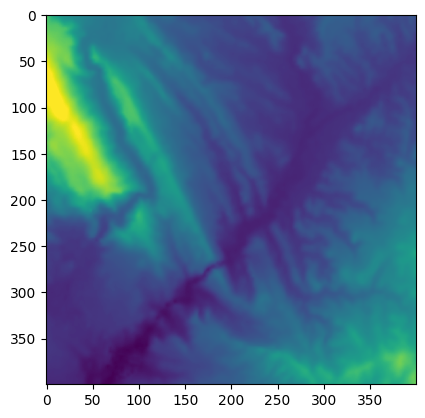

In [28]:
plt.imshow(elevation)
plt.show()

In [29]:
pointdata = PointData(Scalars(data))
data = VtkData(StructuredPoints([400,400]), pointdata)

In [30]:
data.tofile('elevation','ascii')

#### Activities:

- open in ParaView
- apply 'warpToScalar' filter
- adjust colormap / representation to best highlight elevation differences

## Elevation data example 2:

In [31]:
from pyvista import examples

In [32]:
dem = examples.download_crater_topo()
dem

ImageData (0x28ac7ddc0)
  N Cells:      1677401
  N Points:     1680000
  X Bounds:     1.810e+06, 1.831e+06
  Y Bounds:     5.640e+06, 5.658e+06
  Z Bounds:     0.000e+00, 0.000e+00
  Dimensions:   1400, 1200, 1
  Spacing:      1.500e+01, 1.500e+01, 0.000e+00
  N Arrays:     1

Now let’s subsample and extract an area of interest to make this example simple 
(also the DEM we just load is pretty big). Since the DEM we loaded is a pyvista.ImageData mesh, 

we can use the pyvista.ImageDataFilters.extract_subset() filter:

/Users/javi/anaconda3/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


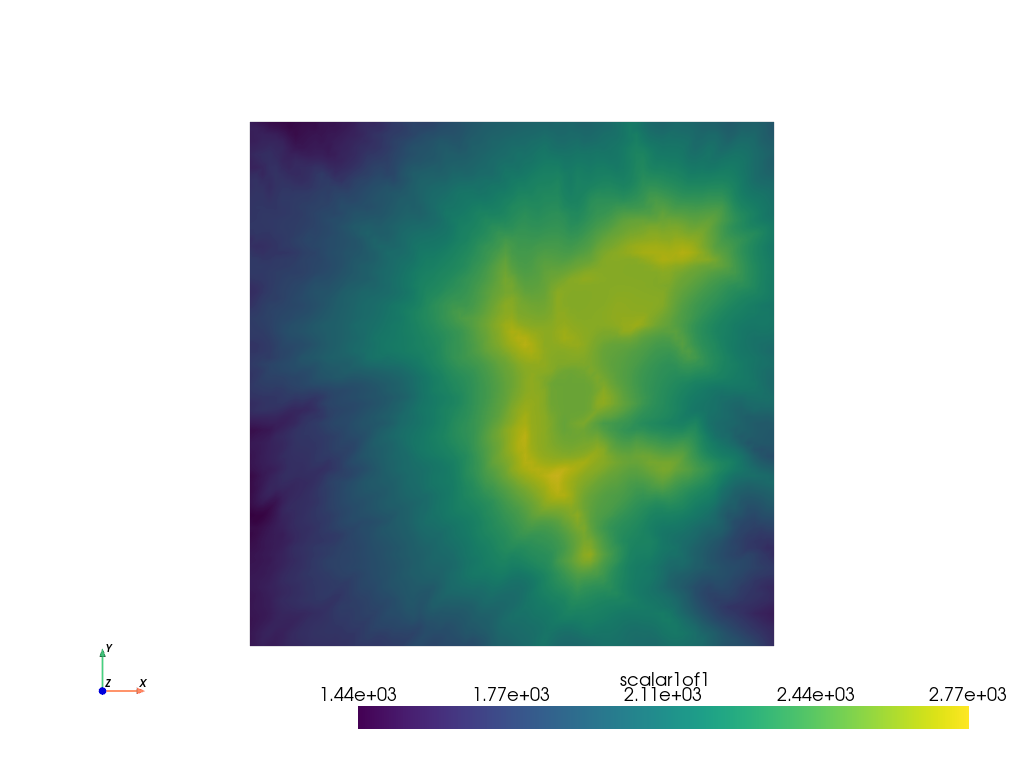

In [33]:
subset = dem.extract_subset((500, 900, 400, 800, 0, 0), (5, 5, 1))
subset.plot(cpos="xy")

In [34]:
terrain = subset.warp_by_scalar()
terrain

StructuredGrid (0x2801ca400)
  N Cells:      6400
  N Points:     6561
  X Bounds:     1.818e+06, 1.824e+06
  Y Bounds:     5.646e+06, 5.652e+06
  Z Bounds:     1.441e+03, 2.769e+03
  Dimensions:   81, 81, 1
  N Arrays:     1

/Users/javi/anaconda3/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


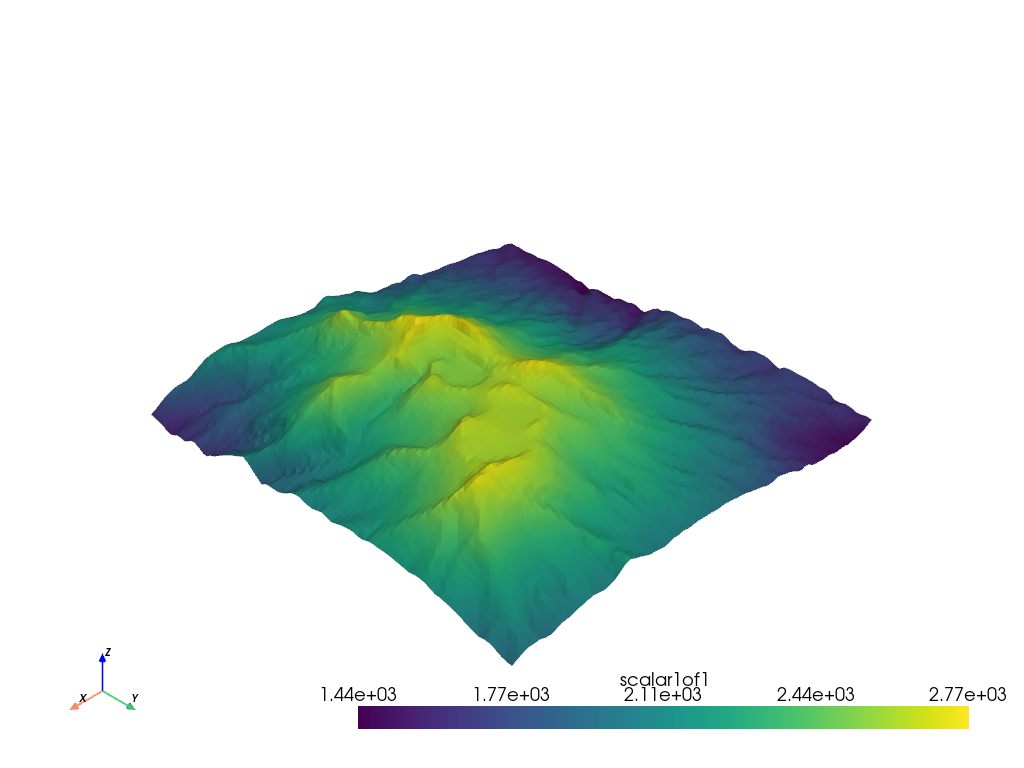

In [35]:
terrain.plot()

And now we have a 3D structured surface of the terrain. We can now extend that structured surface into a 3D mesh to form a terrain following grid.

In [36]:
z_cells = np.array([25] * 5 + [35] * 3 + [50] * 2 + [75, 100])

xx = np.repeat(terrain.x, len(z_cells), axis=-1)
yy = np.repeat(terrain.y, len(z_cells), axis=-1)
zz = np.repeat(terrain.z, len(z_cells), axis=-1) - np.cumsum(z_cells).reshape((1, 1, -1))

mesh = pv.StructuredGrid(xx, yy, zz)
mesh["Elevation"] = zz.ravel(order="F")
mesh

StructuredGrid (0x2801ef760)
  N Cells:      70400
  N Points:     78732
  X Bounds:     1.818e+06, 1.824e+06
  Y Bounds:     5.646e+06, 5.652e+06
  Z Bounds:     9.364e+02, 2.744e+03
  Dimensions:   81, 81, 12
  N Arrays:     1

/Users/javi/anaconda3/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


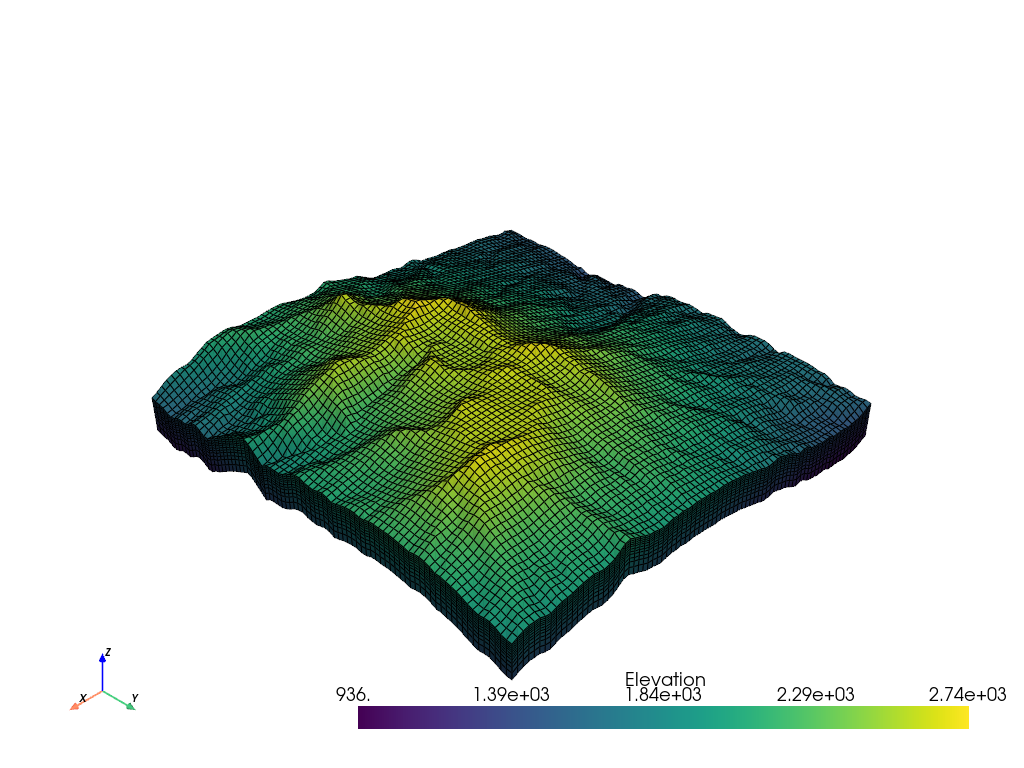

In [37]:
mesh.plot(show_edges=True)

In [38]:
## save to disk
mesh.save('terrain_following_grid.vtk')

## reference:
- https://tutorial.pyvista.org/tutorial/00_jupyter/index.html
- https://tutorial.pyvista.org/tutorial/06_vtk/b_create_vtk.html
- https://docs.pyvista.org/version/stable/examples/
- https://www.youtube.com/watch?v=b8N_xvRZCho&ab_channel=JonasLindemann
- https://docs.pyvista.org/version/stable/examples/00-load/terrain-mesh#sphx-glr-examples-00-load-terrain-mesh-py